*Ressources numériques – Programme BCPST2 2022*
---

# **Contrôle cinétique vs contrôle thermodynamique**

---

**Capacité numérique disciplinaire :** établir un système d’équations différentielles et le résoudre numériquement, à l’aide d’un langage de programmation, afin de visualiser l’évolution des concentrations au cours du temps et mettre en évidence les situations de contrôle cinétique ou thermodynamique.


---



# 1 - Présentation
---


Ce document s'intéresse à la modélisation cinétique d'une transformation mettant en jeu une espèce chimique, notée $\mathsf{A}$, transformée par deux processus compétitifs renversables en deux espèces chimiques, notées $\mathsf{B}$ et $\mathsf{C}$.

Le modèle proposé à l'échelle microscopique est constitué de quatre actes élémentaires monomoléculaires :

\begin{align}   
   \mathsf{ 
    A \xrightarrow{\text{$k_{1d}$}} B  \\
    A \xrightarrow{\text{$k_{2d}$}} C  \\
    B \xrightarrow{\text{$k_{1i}$}} A  \\ 
    C \xrightarrow{\text{$k_{2i}$}} A  \\    }
\end{align}

où $\mathsf{k_1d}$ et $\mathsf{k_2d}$ représentent les constantes de vitesse des deux actes élémentaires de sens direct, $\mathsf{k_1i}$ et $\mathsf{k_2i}$ celles des actes élémentaires du sens inverse.

L'évolution temporelle des concentrations des espèces $\mathsf{A}$, $\mathsf{B}$ et $\mathsf{C}$ est régie par les équations différentielles suivantes :
\begin{align}\mathsf{
    \frac{d[A]}{dt} = - (k_{1d}+k_{2d})\cdot[A] + k_{1i}[B] + k_{2i}[C] \\
    \frac{d[B]}{dt} = + k_{1d}[A] - k_{1i} [B] \\
    \frac{d[C]}{dt} = + k_{2d}[A] - k_{2i} [C] \\ }
\end{align}


### Notations
A l'état initial, la concentration de l'espèce chimique $\mathsf{A}$ est notée $\mathsf{a}$, celle de l'espèce $\mathsf{B}$ est notée $\mathsf{b}$ et celle de l'espèce $\mathsf{C}$ est notée $\mathsf{c}$.


### Manipulation des scripts
Les paramètres suivants peuvent être modifiés : 
* Concentrations initiales des espèces $\mathsf{A}$, $\mathsf{B}$ et $\mathsf{C}$,
* Valeurs des constantes de vitesse (il est en particulier possible d'empêcher les réactions en sens "inverse" en indiquant une valeur nulle pour les constantes de vitesse $\mathsf{k_{1i}}$ et $\mathsf{k_{2i}}$,
* Durée d'intégration (afin de zoommer sur la situation aux temps courts et/ou aux temps longs).

Il est également envisageable de simuler des situations avec des lois de vitesse différentes (acte élémentaire bimoléculaire, etc...)



---
# 2 - Résolution utilisant la méthode d'Euler
---

Les concentrations des espèces $\mathsf{A}$, $\mathsf{B}$ et $\mathsf{C}$ sont évaluées de manière itérative grâce à la méthode d'Euler.

La méthode d'Euler nécessite :
* de saisir les valeurs initiales des grandeurs à intégrer (ici, $\mathsf{a}$, $\mathsf{b}$ et $\mathsf{c}$)
* d'utiliser un pas de calcul $\mathsf{h}$ petit.

En outre, sur le plan chimique, les concentrations des réactifs ne peuvent devenir négatives, ce qui impose une condition supplémentaire dans la boucle de calcul.


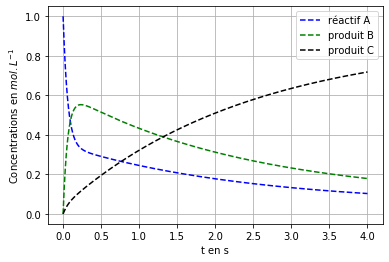

In [4]:
# IMPORTATION DES BIBIOTHÈQUES

import matplotlib.pyplot as plt


# DEFINITIONS DES PARAMETRES 

##Concentrations dans l'état initial
a=1     # en mol/L
b=0     # en mol/L
c=0     # en mol/L

##Paramètres de la méthode d'intégration
h = 0.001     # en s
duree = 4     # en s

##Constantes de vitesse
k1d=10        # en s^(-1)
k1i=6         # en s^(-1)
k2d=1         # en s^(-1)
k2i=0.05      # en s^(-1)


# CALCUL DES VALEURS SUCCESSIVES DES CONCENTRATIONS 
##Initialisation des listes des concentrations et du temps
LT=[0]
LA=[a]
LB=[b]
LC=[c]


##Boucle d'intégration
nbpts=duree/h
i=1
while i <= nbpts and LA[-1] >= 0 :
    A=LA[-1]
    B=LB[-1]
    C=LC[-1]
    LT.append(i*h)
    LA.append(A - k1d*A*h + k1i*B*h - k2d*A*h + k2i*C*h)
    LB.append(B + k1d*A*h - k1i*B*h)
    LC.append(C + k2d*A*h - k2i*C*h)
    i=i+1


# TRACE DES COURBES

plt.figure(1)
plt.plot(LT,LA,'b--', label='réactif A')
plt.plot(LT,LB,'g--', label='produit B')
plt.plot(LT,LC,'k--', label='produit C')
plt.xlabel('t en s')
plt.ylabel('Concentrations en $mol.L^{-1}$')
plt.legend()
plt.grid()
plt.show()



---
# 3 - Résolution utilisant `odeint`
---


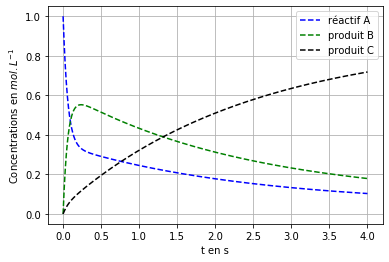

In [3]:
## IMPORTATION DES BIBLIOTHEQUES

import matplotlib.pyplot as plt
from numpy import linspace
from scipy.integrate import odeint


# DEFINITIONS DES PARAMETRES 

##Concentrations dans l'état initial
a=1     # en mol/L
b=0     # en mol/L
c=0     # en mol/L

##Paramètres de la méthode d'intégration
duree = 4     # en s

##Constantes de vitesse
k1d=10        # en s^(-1)
k1i=6         # en s^(-1)
k2d=1         # en s^(-1)
k2i=0.05      # en s^(-1)


# CALCUL DES VALEURS SUCCESSIVES DES CONCENTRATIONS 

t = linspace(0,duree,2000)   #Création d'une liste de valeurs d'abscisses

def f(Z,t) :
  A,B,C = Z
  return - (k1d+k2d)*A + k1i*B + k2i*C , k1d*A - k1i*B , k2d*A - k2i*C

resultat = odeint(f,[a,b,c],t)

A = resultat[:,0]
B = resultat[:,1]
C = resultat[:,2]


# TRACE DES COURBES

plt.figure(1)
plt.plot(t,A,'b--', label='réactif A')
plt.plot(t,B,'g--', label='produit B')
plt.plot(t,C,'k--', label='produit C')
plt.xlabel('t en s')
plt.ylabel('Concentrations en $mol.L^{-1}$')
plt.legend()
plt.grid()
plt.show()




---

# 4 - Application à la réaction de Diels-Alder

---


La réaction entre le furane (noté $\mathsf{A}$) et l’anhydride maléique ($\mathsf{B}$) fournit deux espèces chimiques stéréoisomères : l'une est qualifée d'exo ($\mathsf{C}$), l'autre d'endo ($\mathsf{D}$). Les processus de formation de $\mathsf{C}$ et de $\mathsf{D}$ sont renversables.

\begin{align}   
   \mathsf{ 
    A + B \xrightarrow{\text{$k_{1d}$}} C  \\
    A + B \xrightarrow{\text{$k_{2d}$}} D  \\
    C \xrightarrow{\text{$k_{1i}$}} A + B \\ 
    D \xrightarrow{\text{$k_{2i}$}} A + B  \\    }
\end{align}

Les constantes de vitesse ont été déterminées à deux températures différentes :


*   **à 298 K :**

\begin{array}{c|c|c}  
\mathsf{k_{1d} } & \mathsf{ \rm 7,3 \cdot 10^{-3} } & \mathsf{ L \cdot mol^{-1} \cdot s^{-1}} \\ \hline
\mathsf{k_{1i} } & \mathsf{ \rm 4,4 \cdot 10^{-2} } & \mathsf{ s^{-1}} \\ \hline
\mathsf{k_{1d} } & \mathsf{ \rm 1,6 \cdot 10^{-5} } & \mathsf{ L \cdot mol^{-1} \cdot s^{-1}} \\ \hline
\mathsf{k_{1d} } & \mathsf{ \rm 4,4 \cdot 10^{-6} } & \mathsf{ s^{-1} } \\ 
\end{array}

*   **à 308 K :**
\begin{array}{c|c|c}  
\mathsf{k_{1d} } & \mathsf{ \rm 2,7 \cdot 10^{-2} } & \mathsf{ L \cdot mol^{-1} \cdot s^{-1}} \\ \hline
\mathsf{k_{1i} } & \mathsf{ \rm 1,5 \cdot 10^{-1} } & \mathsf{ s^{-1}} \\ \hline
\mathsf{k_{1d} } & \mathsf{ \rm 6,9 \cdot 10^{-5} } & \mathsf{ L \cdot mol^{-1} \cdot s^{-1}} \\\hline
\mathsf{k_{1d} } & \mathsf{ \rm 2,0 \cdot 10^{-5} } & \mathsf{ s^{-1}} \\ 
\end{array}

Il s'agit ici de déterminer les conditions de température et de durée de réaction permettant d'obtenir majoritairement l'un ou l'autre des deux produits à partir d'un mélange des réactifs dans les proportions stoechiométriques.



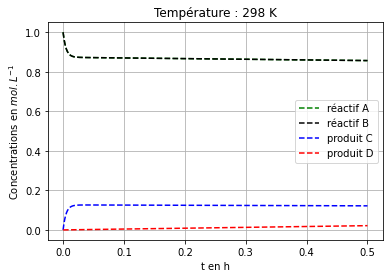

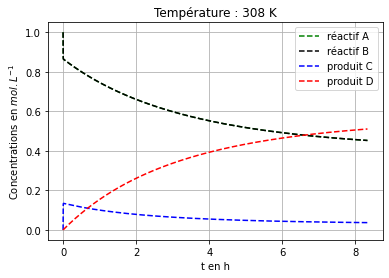

In [ ]:
#IMPORTATION DES BIBIOTHÈQUES

import matplotlib.pyplot as plt


#DEFINITIONS DES PARAMETRES 

"""Températures"""
T = [298 , 308]

"""Concentrations dans l'état initial"""
a=1      # en mol/L
b=1      # en mol/L
c=0      # en mol/L
d=0      # en mol/L

"""Paramètres de la méthode d'intégration"""
h = .1                     # en s
duree = [1800 , 30000]     # en s (durée pour 298 K, durée pour 308 K)


"""Constantes de vitesse"""
# Pour chaque température, dans l'ordre : k_1d, k_1i, k_2d et k_2i
# en L.mol^(-1).s^(-1) ou s^(-1)
Listek = [[7.3E-3 , 4.4E-2 , 1.6E-5 , 4.4E-6] , [2.7E-2 , 1.5E-1 , 6.9E-5 , 2.0E-5]]


#CALCUL DES VALEURS SUCCESSIVES DES CONCENTRATIONS

for n in [0,1]:
    nbpts=duree[n]/h
    LT=[0]
    LA=[a]
    LB=[b]
    LC=[c]
    LD=[d]
    k=Listek[n]
    i=1
    while i <= nbpts and LA[-1] >= 0 and LB[-1] >= 0 :
        A=LA[-1]
        B=LB[-1]
        C=LC[-1]
        D=LD[-1]
        LT.append(i*h/3600)
        LA.append(A + h * (-(k[0]+k[2])*A*B + k[1]*C + k[3]*D))
        LB.append(B + h * (-(k[0]+k[2])*A*B + k[1]*C + k[3]*D))
        LC.append(C + h * (k[0]*A*B - k[1]*C))
        LD.append(D + h * (k[2]*A*B - k[3]*D))
        i=i+1
    plt.figure(n)
    plt.plot(LT,LA,'g--', label='réactif A')
    plt.plot(LT,LB,'k--', label='réactif B')
    plt.plot(LT,LC,'b--', label='produit C')
    plt.plot(LT,LD,'r--', label='produit D')
    plt.title(f"Température : {T[n]} K")
    plt.xlabel('t en h')
    plt.ylabel('Concentrations en $mol.L^{-1}$')
    plt.legend()
    plt.grid()

plt.show()


---

# 5 - Conclusion 
---

### Contrôle cinétique de sélectivité
Aux temps courts, pour une durée de transformation de 15 min à 298 K, le produit *exo* ($\mathsf{C}$) est majoritaire dans le mélange réactionnel. 

En effet, pour de courtes durées de transformation, les concentrations des espèces chimiques produites C et D sont encore faibles et seuls les processus en *sens direct* ont des effets appréciables. 
\begin{equation}\mathsf{
    \frac{d[C]}{dt} = k_{1d}[A][B] \\
    \frac{d[D]}{dt} = k_{2d}[A][B] \\
    \frac{d[C]}{d[D]} = \frac{k_{1d}}{k_{2d}}\\
}
\end{equation}  


Par intégration,cette relation conduit au rapport des concentrations des espèces produites $\mathsf{C}$ et $\mathsf{D}$ : 
\begin{equation}\mathsf{
    \int_{0}^{[C]}d[C] = \frac{k_{1d}}{k_{2d}}\int_{0}^{[D]} d[D] \\
    [C] = \frac{k_{1d}}{k_{2d}}[D] \\
    \frac{[C]}{[D]} = \frac{k_{1d}}{k_{2d}}\\
}
\end{equation}    

**Le produit majoritaire aux temps courts est le produit formé le plus facilement : on le qualifie de produit cinétique.**



### Contrôle thermodynamique de sélectivité
A 308 K, en laissant le système réagir pendant 8h, il est possible d'obtenir de façon majoritaire le produit *endo* ($\mathsf{D}$).

En effet, travailler à plus haute température permet d'augmenter les constantes de vitesse, en particulier, celles des réactions du *sens inverse*. D'autre part, sur des durées de transformation longues, les concentrations des espèces produites ne sont plus forcément négligeables devant celles des réactifs. Les réactions en *sens inverse* ne peuvent plus être négligées.

Au bout d'un certain temps, le système atteint un équilibre chimique caractérisé par deux relations de Guldberg-Waage :

\begin{equation}\mathsf{
    K_1^o=\frac{[C]_\infty C°}{[A]_\infty[B]_\infty} \\
    K_2^o=\frac{[D]_\infty C°}{[A]_\infty[B]_\infty} }
\end{equation}  

Le rapport de ces deux expressions permet d'obtenir une expression du rapport des concentrations des espèces produites aux temps longs :
\begin{equation}\mathsf{
    \frac{[C]_\infty}{[D]_\infty}=\frac{K_1^o}{K_2^o} }
\end{equation} 

**Le produit majoritaire aux temps longs est le produit le plus stable : on le qualifie de produit thermodynamique.**